In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [192]:
df = pd.read_csv('train.csv')

In [193]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [194]:
df.describe()

,VENDIDO
count,78331.00000
mean,0.60732
std,0.48835
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78331 entries, 0 to 78330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marca             77973 non-null  object
 1   nomeDaPeca        78331 non-null  object
 2   precoComDesconto  78331 non-null  object
 3   precoSemDesconto  76821 non-null  object
 4   Descricao         78323 non-null  object
 5   Tamanho           78055 non-null  object
 6   Condicao          78331 non-null  object
 7   Cores             76728 non-null  object
 8   VENDIDO           78331 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [196]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [197]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [198]:
df['Tamanho'].unique()

array(['m', '38', ' 39', 'p', ' 38', ' 36', ' U', 'u', '34', ' M', '36',
       ' 42', 'g', 'pp', '42', ' 35', '40', ' P', '6', nan, '14', ' 34',
       ' 40', ' G', 'gg', '44', '3m', '50', '3', '4', ' PP', '8', '33',
       ' 6M', ' 3M', ' 10M', ' 12M', '12', '37', '35', '48', '16', ' RN',
       '2a', ' GG', ' 37', ' 44', '1', 'rn', '6m', '32', '21', '12m',
       'xgg', '18m', ' 8A', '7', ' 12A', '9m', '46', ' 2A', '5', '2',
       '39', '54', ' 20', ' 1A', ' 10A', ' 18', '10', '29', ' 4A', '30',
       ' 50', ' 6A', ' 48', ' 46', ' 16', '52', '11', ' 17', ' 33', '13',
       '22', ' 14A', '41', '20', '9', ' 21', ' 19', '31', '25', ' 41',
       '58', '17', ' 13', ' 26', '19', '28', '23', '26', ' 14', ' 4',
       '24', '43', ' 3A', ' 32', '56', ' 1', ' XLG', ' 23', ' 15', 'M',
       '27', '18', ' G3', ' 24', '15', ' 54', ' 3', ' 56', ' G4', '45',
       ' 5G', ' 28', '60', ' 27', 'P'], dtype=object)

In [199]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO
0,sem marca,\r\nBlusa Verde Babados\r\n,64.00,160.0,Blusa verde com modelagem básica. Peça com bab...,m,gentilmente usada,verde,0
1,zara,\r\nSaia Lápis Zara\r\n,57.00,219.0,Marca: Zara Woman,38,gentilmente usada,"Detalhe: Dois bolsos frontais, forro, zíper tr...",1
2,1 a 9,\r\nJeans Skinny 1 a 9\r\n,69.00,279.0,"Medidas: cintura 32cm, quadril 43cm, comprime...",38,gentilmente usada,azul,0
3,Coach,Sapatilha Monograma,25000.00,87500.0,Sapatilha caramelo. Possui monograma em toda a...,39,Usado,\r\nCaramelo \r\nPreto \r\n,1
4,primeiro item teen,\r\nShorts Feminino Teen Corações\r\n,20.97,69.9,"Shorts feminino, com estampa de corações, do P...",m,gentilmente usada,colorido,0
...,...,...,...,...,...,...,...,...,...
78326,mandi,\r\nCamisa Preta Mandi\r\n,15.00,69.9,"Camisa feminina, preta, da Mandi. Tecido plano...",m,gentilmente usada,preto,0
78327,mo,\r\nSaia Branca Bordada\r\n,33.75,135.0,"Saia branca com bordados em linha prata, azul ...",p,gentilmente usada,branco,1
78328,luigi bertolli,\r\nVestido Floral Preto e Vermelho Luigi Bert...,27.48,89.9,"Vestido preto com flores vermelhas, da Luigi B...",gg,gentilmente usada,colorido,1
78329,Zara,Blazer Tweed Bege,7000.00,28000.0,"Blazer em tweed, nas cores bege e dourado. Pos...",P,Usado,\r\nBege \r\n,1


In [200]:
df2 = pd.read_csv('test.csv')

In [201]:
df2['precoComDesconto'] = pd.to_numeric(df2['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df2['precoSemDesconto'] = pd.to_numeric(df2['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [202]:
df2['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df2['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [203]:
df.isnull().sum()

marca                358
nomeDaPeca             0
precoComDesconto       0
precoSemDesconto    1510
Descricao              8
Tamanho              276
Condicao               0
Cores               1603
VENDIDO                0
dtype: int64

C:\Users\filipe.sampaio\AppData\Local\Temp\ipykernel_12124\381426080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))


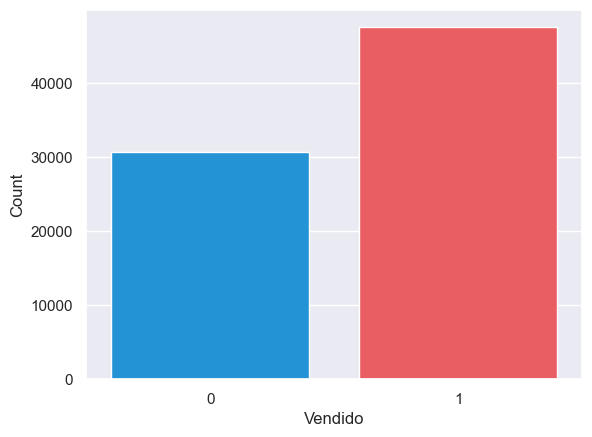

In [204]:
sns.set(style="darkgrid")
ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Vendido')
plt.ylabel('Count')
plt.show()

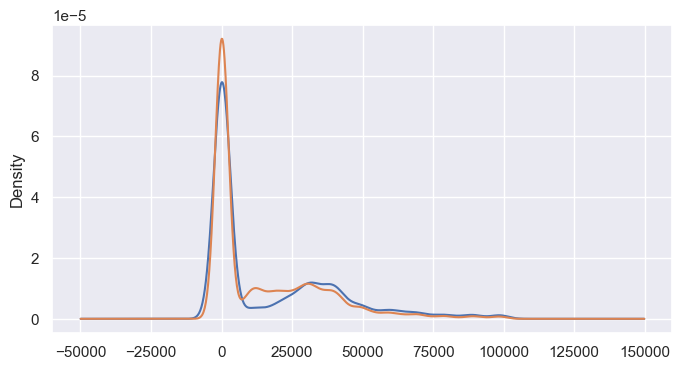

In [205]:
fig=plt.figure(figsize=(8,4))
for x in [0,1]:
    df['precoSemDesconto'][df['VENDIDO']==x].plot(kind='kde')
    


plt.show()

In [206]:
df['Condicao'].unique()

array(['gentilmente usada', 'Usado', 'Novo com etiqueta',
       'nova com etiqueta', 'Novo sem etiqueta', 'novo com etiqueta'],
      dtype=object)

In [207]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Tamanho', 'Condicao', 'Cores']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    

In [227]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Tamanho', 'Condicao', 'Cores']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df2[column] = label_encoders[column].fit_transform(df2[column])

In [208]:
df = df.drop(['nomeDaPeca', 'Descricao'], axis= 1)

In [228]:
df2 = df2.drop(['nomeDaPeca', 'Descricao'], axis= 1)

In [209]:
df['marca']

0         9669
1        11340
2          229
3          576
4         8922
         ...  
78326     7282
78327     7833
78328     7041
78329     1611
78330     1611
Name: marca, Length: 78331, dtype: int32

In [253]:
X = df.drop(['VENDIDO'], axis=1)
y = df['VENDIDO']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [255]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
print(df.isnull().sum())

marca               0
precoComDesconto    0
precoSemDesconto    0
Tamanho             0
Condicao            0
Cores               0
VENDIDO             0
dtype: int64


In [214]:
df.fillna(df.mean(), inplace=True)

In [229]:
df2.fillna(df2.mean(), inplace=True)

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [216]:
y_train = y_train.values.ravel()

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [252]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Número de árvores
    'max_depth': [None, 10, 20, 30],       # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],      # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]         # Número mínimo de amostras em uma folha
}


In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Melhores hiperparâmetros encontrados:", best_params)
print("Melhor acurácia encontrada:", best_accuracy)


Training and evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

     class 0       0.55      0.43      0.48     21506
     class 1       0.68      0.77      0.72     33325

    accuracy                           0.64     54831
   macro avg       0.61      0.60      0.60     54831
weighted avg       0.63      0.64      0.63     54831



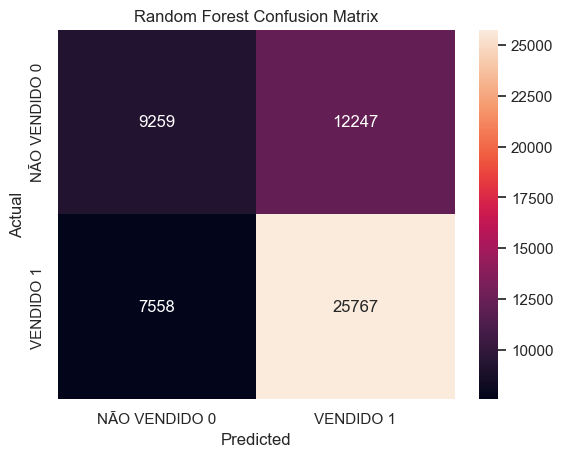

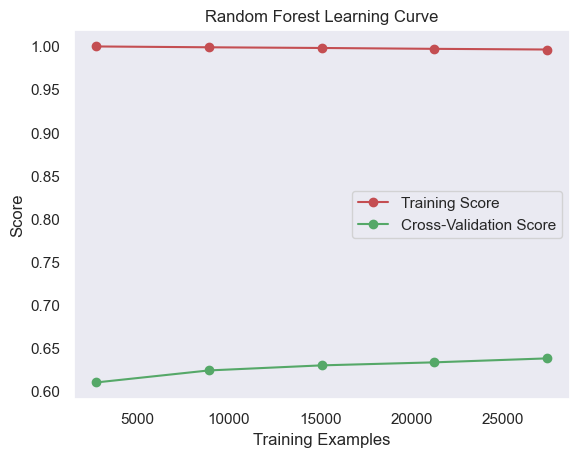

Random Forest Accuracy: 0.64


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


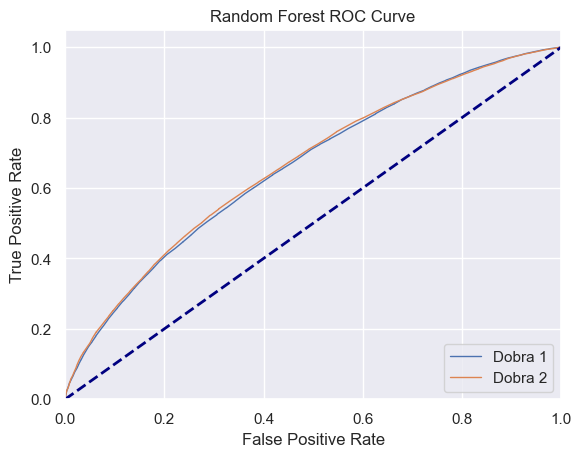

Training and evaluating Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     class 0       0.55      0.08      0.13     21506
     class 1       0.62      0.96      0.75     33325

    accuracy                           0.61     54831
   macro avg       0.58      0.52      0.44     54831
weighted avg       0.59      0.61      0.51     54831



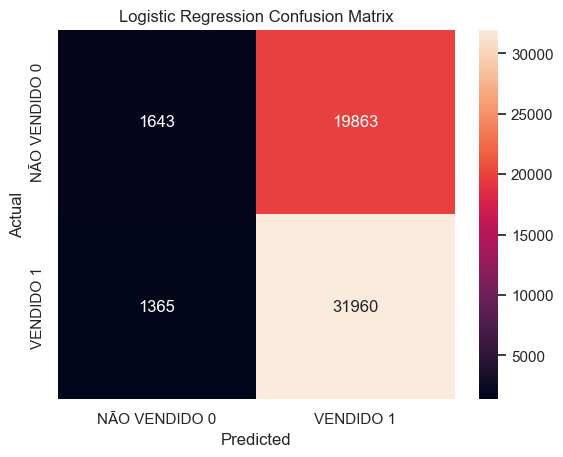

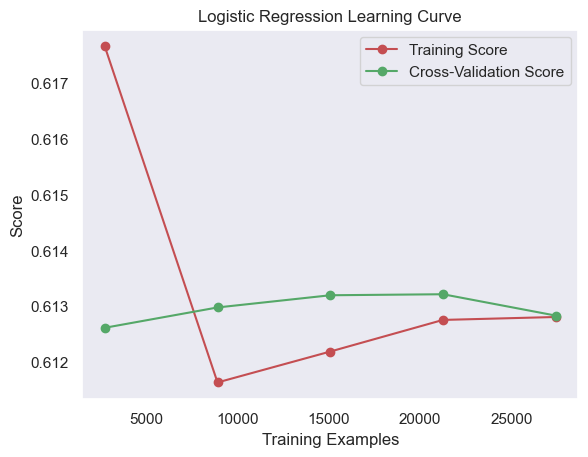

Logistic Regression Accuracy: 0.61


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


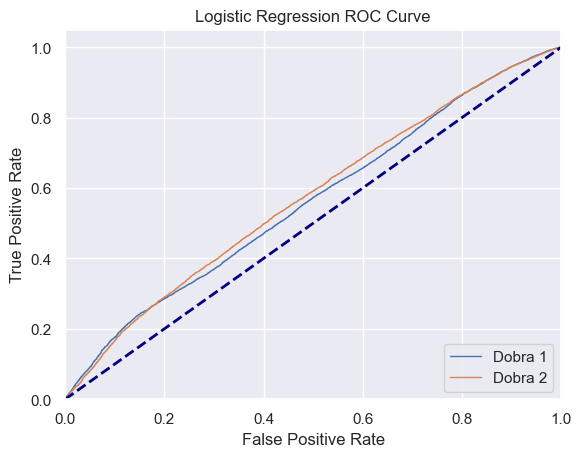

Training and evaluating KNN...
KNN Classification Report:
              precision    recall  f1-score   support

     class 0       0.47      0.39      0.43     21506
     class 1       0.65      0.71      0.68     33325

    accuracy                           0.59     54831
   macro avg       0.56      0.55      0.55     54831
weighted avg       0.58      0.59      0.58     54831



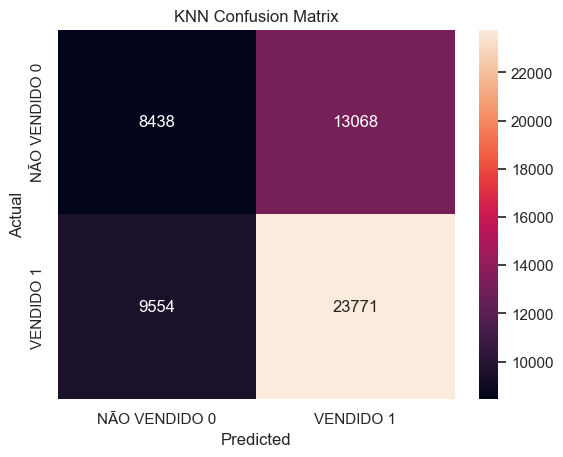

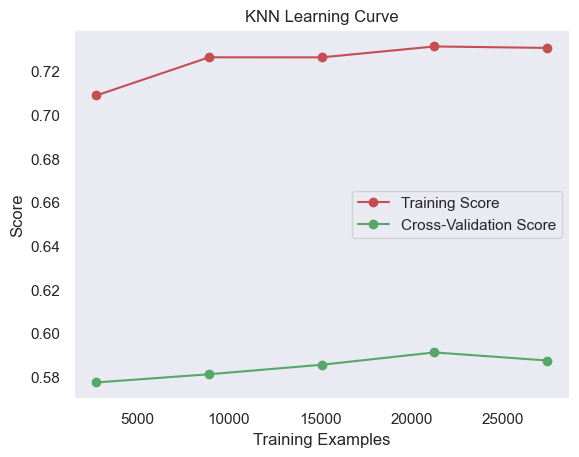

KNN Accuracy: 0.59


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


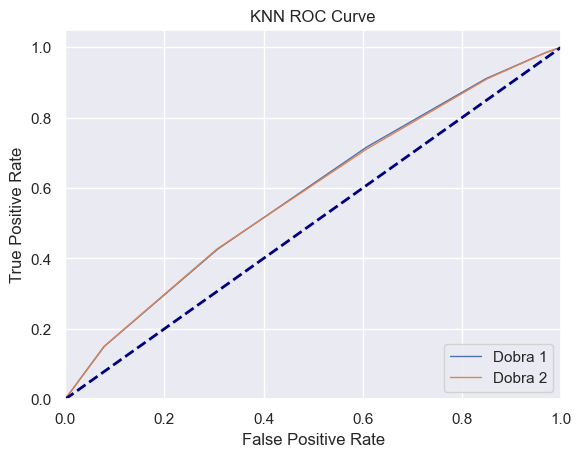

Training and evaluating Gaussian Naïve Bayes...
Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.15      0.23     21506
     class 1       0.62      0.91      0.74     33325

    accuracy                           0.61     54831
   macro avg       0.57      0.53      0.49     54831
weighted avg       0.58      0.61      0.54     54831



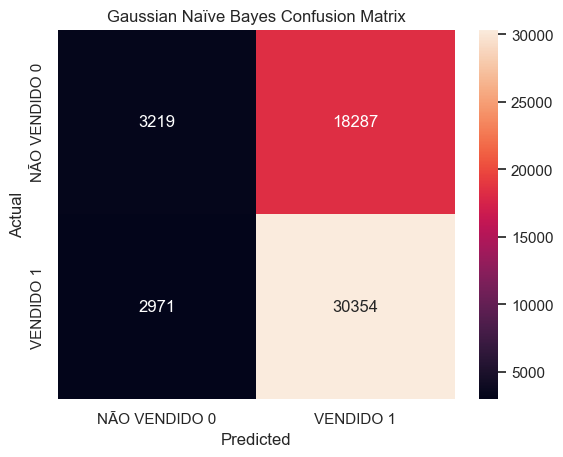

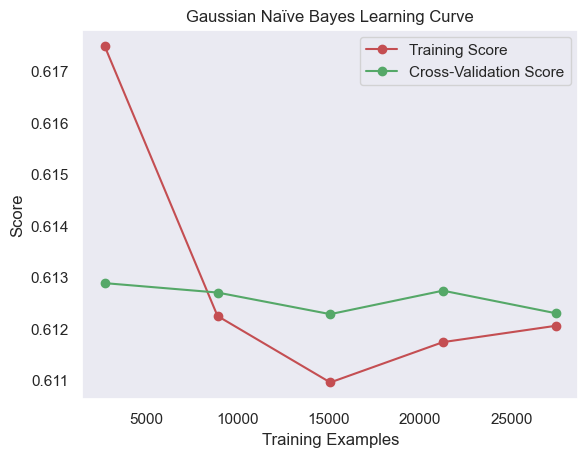

Gaussian Naïve Bayes Accuracy: 0.61


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


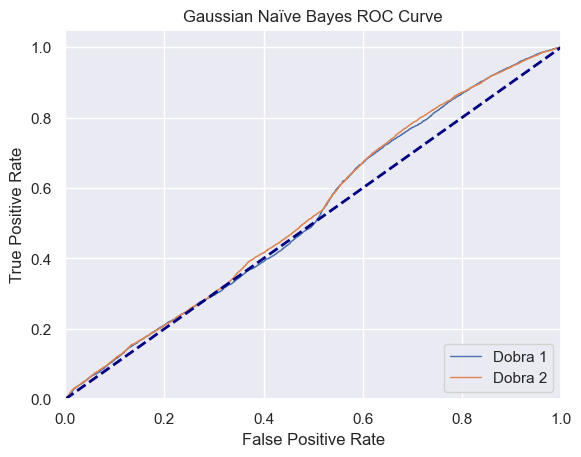

Training and evaluating Decision Tree Classifier...
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     class 0       0.47      0.48      0.48     21506
     class 1       0.66      0.65      0.66     33325

    accuracy                           0.59     54831
   macro avg       0.57      0.57      0.57     54831
weighted avg       0.59      0.59      0.59     54831



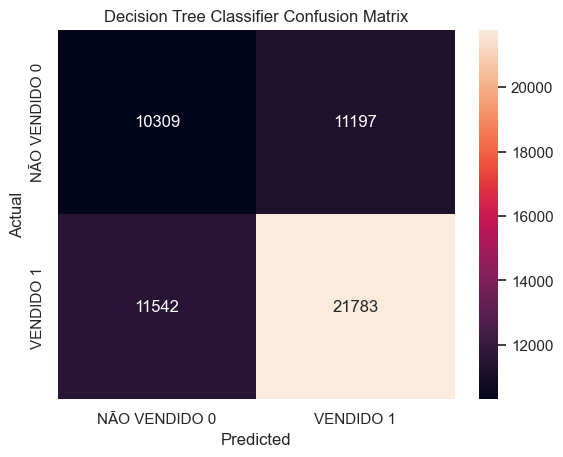

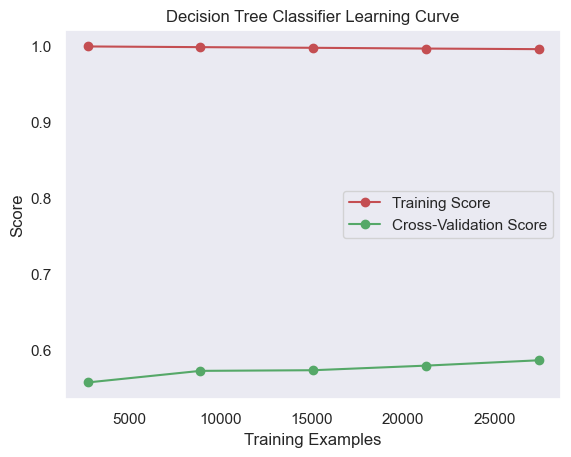

Decision Tree Classifier Accuracy: 0.59


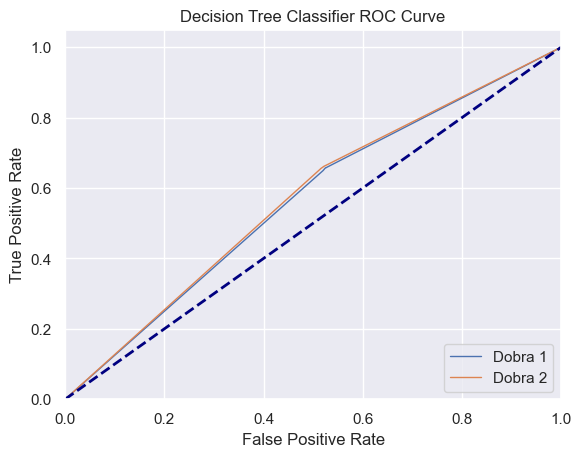

Training and evaluation of all models completed.


In [222]:
# Lista de modelos
models = [
    ('Random Forest', RandomForestClassifier()),
    #('SVM', SVC(kernel='sigmoid')),  # Use um kernel que suporte probabilidades
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian Naïve Bayes', GaussianNB()),
    #('Support Vector Machines', SVC()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
]

for name, model in models:
    print(f"Training and evaluating {name}...")

    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')

    # Estatísticas
    target_names = ['class 0', 'class 1']

    # Em seguida, use os rótulos de classe corrigidos no seu código
    print(f"{name} Classification Report:")
    print(classification_report(y_train, y_pred, target_names=target_names))

    # Matriz de Confusão
    cm = confusion_matrix(y_train, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['NÃO VENDIDO 0','VENDIDO 1'], yticklabels=['NÃO VENDIDO 0','VENDIDO 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Curva de Aprendizado
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=2, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.show()

    accuracy_mean = accuracy.mean()
    print(f"{name} Accuracy: {accuracy_mean:.2f}")

    # Curva ROC (fora do loop de validação cruzada)
    if name != 'SVM':  # SVM não suporta probabilidade
        lb = LabelBinarizer()
        y_bin = lb.fit_transform(y_train)
        
        # Use StratifiedKFold para manter a proporção de classes na validação cruzada
        cv = StratifiedKFold(n_splits=2)
        tpr_list = []
        fpr_list = []
        roc_auc_list = []
        
        for train_idx, test_idx in cv.split(X_train, y_train):
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_bin[train_idx], y_bin[test_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_score = model.predict_proba(X_test_fold)
            fpr, tpr, _ = roc_curve(y_test_fold.ravel(), y_score[:, 1].ravel())
            roc_auc = auc(fpr, tpr)
            
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            roc_auc_list.append(roc_auc)
        
        # Plot a curva ROC para cada dobra individual
        plt.figure()
        for i in range(len(tpr_list)):
            plt.plot(fpr_list[i], tpr_list[i], lw=1, label=f'Dobra {i+1}')
        
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


print("Training and evaluation of all models completed.")

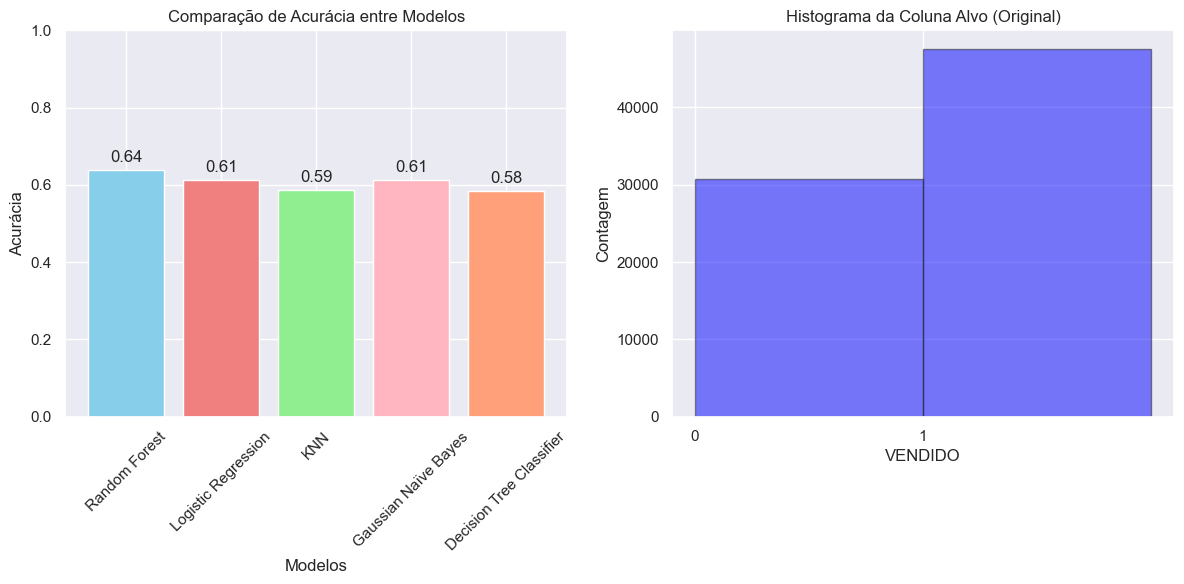

In [223]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie uma lista para armazenar os resultados de cada modelo
model_names = []
accuracies = []

for name, model in models:
    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Armazene os resultados do modelo atual
    model_names.append(name)
    accuracies.append(accuracy)

# Crie um gráfico de barras para comparar as precisões de cada modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Defina cores para as barras
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen']

plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1.0)  # Defina o limite vertical de 0 a 1 para a precisão
plt.xticks(rotation=45)  # Rode os nomes dos modelos para facilitar a leitura

# Adicione as barras de precisão acima das barras
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

# Histograma da coluna alvo do dataset original
plt.subplot(1, 2, 2)
plt.hist(df['VENDIDO'], bins=[0, 1, 2], edgecolor='k', alpha=0.5, color='blue')
plt.xticks([0, 1])
plt.xlabel('VENDIDO')
plt.ylabel('Contagem')
plt.title('Histograma da Coluna Alvo (Original)')

plt.tight_layout()
plt.show()


In [ ]:
df['VENDIDO'].value_counts()

VENDIDO
1    47572
0    30759
Name: count, dtype: int64

In [ ]:
df['marca'].value_counts()

marca
sem etiqueta       3669
Zara               2984
Mixed              2072
Animale            1602
Le Lis Blanc       1288
                   ... 
tanoshi               1
m.j.                  1
farasion              1
malhas tentação       1
mo                    1
Name: count, Length: 11479, dtype: int64

In [232]:
df2 = df2.drop('Unnamed: 0', axis =1)

In [233]:
df2

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores
0,409,64.00,160.0,25,0,643
1,3534,57.00,219.0,96,3,1179
2,1544,69.00,279.0,113,3,947
3,1097,25000.00,87500.0,48,2,585
4,1122,20.97,69.9,46,2,681
...,...,...,...,...,...,...
38577,5169,10000.00,32000.0,113,3,1185
38578,961,12000.00,36000.0,47,0,0
38579,6072,13800.00,45900.0,113,3,1183
38580,1567,11.96,29.9,90,3,1180


In [243]:
df

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores,VENDIDO
0,9669,64.00,160.0,121,3,1939,0
1,11340,57.00,219.0,92,3,1454,1
2,229,69.00,279.0,92,3,1921,0
3,576,25000.00,87500.0,30,2,727,1
4,8922,20.97,69.9,121,3,1926,0
...,...,...,...,...,...,...,...
78326,7282,15.00,69.9,121,3,1935,0
78327,7833,33.75,135.0,122,3,1924,1
78328,7041,27.48,89.9,120,3,1926,1
78329,1611,7000.00,28000.0,53,2,478,1


In [242]:
for name, model in models:
    y_pred = model.predict(df2.iloc[:35000])

C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [244]:
from sklearn.metrics import accuracy_score

y_real = df['VENDIDO'].sample(n=35000, random_state=42)
# Certifique-se de que o conjunto de dados de previsão (y_pred) também tenha 35.000 valores

In [246]:
y_real.shape

(35000,)

In [250]:
from sklearn.metrics import accuracy_score

# Crie uma lista para armazenar as acurácias de todos os modelos
acuracias = []

# Itere por todos os modelos
for name, model in models:
    # Faça a previsão para o modelo atual
    y_pred = model.predict(df2.iloc[:35000])
    
    # Calcule a acurácia
    y_real = df['VENDIDO'].sample(n=35000, random_state=42)  # Garanta que y_real tenha o mesmo número de amostras
    acuracia = accuracy_score(y_real, y_pred)
    
    # Armazene a acurácia na lista
    acuracias.append((name, acuracia))

# Imprima as acurácias de todos os modelos
for name, acuracia in acuracias:
    print(f'{name}: Acurácia = {acuracia:.2f}')


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Random Forest: Acurácia = 0.61
Logistic Regression: Acurácia = 0.39
KNN: Acurácia = 0.50
Gaussian Naïve Bayes: Acurácia = 0.48
Decision Tree Classifier: Acurácia = 0.60


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [259]:
# Divida os dados em recursos (X) e rótulos (y)
X = df.drop('VENDIDO', axis=1)
y = df['VENDIDO']

# Codifique as colunas categóricas, se necessário
# Use One-Hot Encoding ou Label Encoding, conforme apropriado

# Divida os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Padronize os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Epoch 1/10
857/857 [==============================] - 2s 2ms/step - loss: 0.6577 - accuracy: 0.6151 - val_loss: 0.6542 - val_accuracy: 0.6201
Epoch 2/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.6191 - val_loss: 0.6532 - val_accuracy: 0.6220
Epoch 3/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6521 - accuracy: 0.6183 - val_loss: 0.6550 - val_accuracy: 0.6119
Epoch 4/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.6195 - val_loss: 0.6530 - val_accuracy: 0.6195
Epoch 5/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6502 - accuracy: 0.6209 - val_loss: 0.6509 - val_accuracy: 0.6203
Epoch 6/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6495 - accuracy: 0.6210 - val_loss: 0.6516 - val_accuracy: 0.6191
Epoch 7/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6492 - accuracy: 0.6213 - val_loss: 0.6527 - val_accuracy: 0.6226
Epoch 

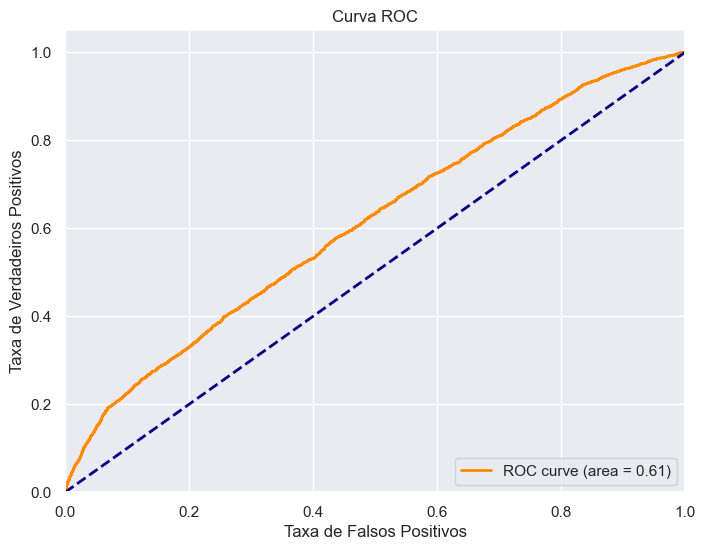

In [260]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Treine o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Avalie o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Matriz de Confusão
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Matriz de Confusão:')
print(conf_matrix)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
